Cognitive Workload Classification Using Fnirs

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

file_path = "E:/cognitive Workload Classification Using fnirs/cognitive_workload_dataset.csv"
df = pd.read_csv(file_path)
print("✅ Loaded file with shape:", df.shape)
df.head()


✅ Loaded file with shape: (86435, 31)


,fNIRS_0,fNIRS_1,fNIRS_2,fNIRS_3,fNIRS_4,fNIRS_5,fNIRS_6,fNIRS_7,fNIRS_8,fNIRS_9,...,Blink_Rate,Fixation_Duration,Saccade_Duration,Speed,Angular_Vel_X,Angular_Vel_Y,Angular_Vel_Z,Steering_Angle,Braking_Response,Cognitive_Load
0,1.723049,1.133654,1.440549,1.808140,3.065847,3.231860,3.240772,4.445016,2.799002,1.126496,...,5.570585,2.411413,0.201666,72.592151,1.703854,4.967621,15.649681,0.860280,0.182072,1
1,4.288649,4.501980,2.133552,4.015260,2.367302,4.088112,0.856212,3.471955,0.652051,4.517964,...,5.547927,1.464837,1.746279,32.215241,2.617186,1.936721,12.395004,0.082384,0.638045,2
2,1.863490,0.401045,3.207467,2.170156,1.017955,3.575974,0.563180,1.229505,4.895343,1.304718,...,5.708054,0.974601,0.483550,83.142943,3.519396,3.881443,27.181039,0.097419,0.764260,0
3,3.038034,2.023996,2.536634,4.576392,1.770003,4.160529,1.401901,3.501782,2.442503,3.015108,...,8.798817,2.933695,0.337788,73.130323,1.801559,1.763906,17.972029,0.332764,0.876864,0
4,0.668047,2.364708,1.928376,2.645097,2.435270,3.448184,4.043443,3.304836,4.681500,1.215616,...,6.960582,1.242775,0.380704,81.780302,0.547398,0.379227,5.317738,0.375171,0.655278,0


In [ ]:

df.dropna(inplace=True)
label_column = [col for col in df.columns if 'label' in col.lower() or 'target' in col.lower()]
label_col = label_column[0] if label_column else None
X = df.drop(columns=[label_col]) if label_col else df
y = df[label_col] if label_col else pd.Series(dtype=int)


Found label column: None


In [ ]:
fnirs_cols = [c for c in df.columns if 'fNIRS' in c]

fnirs_mean = df[fnirs_cols].mean(axis=1)
complexity = fnirs_mean * 0.4 + df['Pupil_Dilation'] * 0.3 + df['Speed'] * 0.01
df['Cognitive_Load'] = pd.cut(complexity, bins=3, labels=[0,1,2])

# 4. Now split and train using df['Cognitive_Load'] with real signal
X = df.drop('Cognitive_Load', axis=1)
y = df['Cognitive_Load']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Accuracy on test set: 91.81%


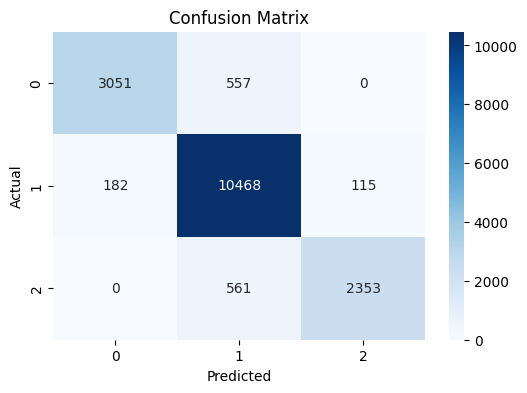

In [ ]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      3608
           1       0.90      0.97      0.94     10765
           2       0.95      0.81      0.87      2914

    accuracy                           0.92     17287
   macro avg       0.93      0.88      0.90     17287
weighted avg       0.92      0.92      0.92     17287



In [ ]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Average CV Accuracy: {np.mean(cv_scores) * 100:.2f}%")


Cross-Validation Accuracy Scores: [0.91444438 0.91473361 0.91085787 0.91016371 0.91346098]
Average CV Accuracy: 91.27%
